In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import sqlite3
import seaborn as sns
plt.style.use('seaborn-v0_8-deep')
import matplotlib.gridspec as gridspec
import plotly.express as px
import geopandas as gpd
import pyproj
import plotly.io as pio
import plotly.graph_objects as go

In [2]:
df = pd.read_csv ('HKGS_Dataset_Public-Open-Space_2022-08-29-1538-32_fullset.csv')
df.head()

,Ownership,Address,Area (about) (m²),提供無障礙通道設施,備註,名稱,Name,Remarks,Northing,地址,...,前往方法 / 所處位置,所屬分區地政處,Opening Hours,Provision of Barrier-free-access Facilities,Provision of Sheltered Seating,業權,所屬區議會,面積(約)（平方米）,Relevant District Council,Easting
0,Multiple Ownership,1 LOHAS PARK ROAD,7432,提供無障礙通道設施,NaN,日出康城,LOHAS Park,NaN,817302.0,康城路 1號,...,位於該發展項目的四樓，可由港鐵康城站前往。,西貢地政處,Opening to the public at all times,Barrier-free-access facilities available,NaN,共有業權,西貢,7432,SAI KUNG,845680.0
1,Single Ownership,33 HIP WO STREET,5749,提供無障礙通道設施,NaN,凱滙,Grand Central,NaN,819502.0,協和街 33號,...,"該處有兩幅休憩空間,面積分別約為1,716及4,033平方米。位於地面及三樓，可由裕民坊，康...",九龍東區地政處,"For open space at ground level, opening to the...",Barrier-free-access facilities available,Sheltered seating not available,單一業權,觀塘,5749,KWUN TONG,841113.0
2,Single Ownership,31 - 33 Tsing King Road,5070,提供無障礙通道設施,NaN,青衣城2期,Maritime Square Phase 2,NaN,824555.0,新界青衣青敬路31-33號,...,青衣青敬路青衣城商場2期戶外平台及天台花園 (休憩用地),荃灣葵青地政處,from 8:00 a.m. to 9:00 p.m.,Barrier-free-access facilities available,Sheltered seating not available,單一業權,葵青,5070,KWAI TSING,829084.0
3,Single Ownership,8 YEUNG UK ROAD,3423,提供無障礙通道設施,NaN,如心廣場,Nina Tower,NaN,825539.0,楊屋道 8號,...,兩個都位於地面，一個是位處楊屋道與大河道之間，另一個位於項目及荃灣公園之間。,荃灣葵青地政處,Opening to the public at all times,Barrier-free-access facilities available,Sheltered seating not available,單一業權,荃灣,3423,TSUEN WAN,829665.0
4,Single Ownership,181 Chatham Road South,7941,提供無障礙通道設施,NaN,香港理工大學八期,Phase 8 Development of the Hong Kong Polytechn...,NaN,818587.0,漆咸道南181號,...,主要部分的公共休憩用地在大樓六樓。可從漆咸道南或經漆咸道南行人天橋抵達。,九龍西區地政處,Opens from 07:00 a.m. to 12:00 midnight daily,Barrier-free-access facilities available,Sheltered seating not available,單一業權,油尖旺,7941,YAU TSIM MONG,836507.0


In [3]:
df.dtypes

Ownership                                       object
Address                                         object
Area (about) (m²)                               object
提供無障礙通道設施                                       object
備註                                              object
名稱                                              object
Name                                            object
Remarks                                         object
Northing                                       float64
地址                                              object
GMID                                            object
提供有蓋座位                                          object
Accessibility / Location                        object
Relevant District Lands Office                  object
開放時間                                            object
前往方法 / 所處位置                                     object
所屬分區地政處                                         object
Opening Hours                                   object
Provision 

In [4]:
cols_del = [3,4,5,9,11,14,15,16,20,21,22]
df2 = df.drop(df.columns[cols_del], axis=1)
df2.head()

,Ownership,Address,Area (about) (m²),Name,Remarks,Northing,GMID,Accessibility / Location,Relevant District Lands Office,Opening Hours,Provision of Barrier-free-access Facilities,Provision of Sheltered Seating,Relevant District Council,Easting
0,Multiple Ownership,1 LOHAS PARK ROAD,7432,LOHAS Park,NaN,817302.0,aiFL4QwHuZ,It is at 4/F and accessible from MTR LOHAS Par...,"DISTRICT LANDS OFFICE, SAI KUNG",Opening to the public at all times,Barrier-free-access facilities available,NaN,SAI KUNG,845680.0
1,Single Ownership,33 HIP WO STREET,5749,Grand Central,NaN,819502.0,UmOF1rER4o,There are 2 parcels of open space and their re...,"DISTRICT LANDS OFFICE, KOWLOON EAST","For open space at ground level, opening to the...",Barrier-free-access facilities available,Sheltered seating not available,KWUN TONG,841113.0
2,Single Ownership,31 - 33 Tsing King Road,5070,Maritime Square Phase 2,NaN,824555.0,qazT4s1k3p,Roof and Flat Roof Garden (Open Space) in Mari...,"DISTRICT LANDS OFFICE, TSUEN WAN AND KWAI TSING",from 8:00 a.m. to 9:00 p.m.,Barrier-free-access facilities available,Sheltered seating not available,KWAI TSING,829084.0
3,Single Ownership,8 YEUNG UK ROAD,3423,Nina Tower,NaN,825539.0,gepLB1D3NR,Both are located on the ground level. One is l...,"DISTRICT LANDS OFFICE, TSUEN WAN AND KWAI TSING",Opening to the public at all times,Barrier-free-access facilities available,Sheltered seating not available,TSUEN WAN,829665.0
4,Single Ownership,181 Chatham Road South,7941,Phase 8 Development of the Hong Kong Polytechn...,NaN,818587.0,0bdQlzzkqg,Major portion of the Public Open Space on 6/F ...,"DISTRICT LANDS OFFICE, KOWLOON WEST",Opens from 07:00 a.m. to 12:00 midnight daily,Barrier-free-access facilities available,Sheltered seating not available,YAU TSIM MONG,836507.0


In [5]:
df2.columns

Index(['Ownership', 'Address', 'Area (about) (m²)', 'Name', 'Remarks',
       'Northing', 'GMID', 'Accessibility / Location',
       'Relevant District Lands Office', 'Opening Hours',
       'Provision of Barrier-free-access Facilities',
       'Provision of Sheltered Seating', 'Relevant District Council',
       'Easting'],
      dtype='object')

In [6]:
df2.shape

(89, 14)

In [7]:
df_pops = pd.read_csv('HKGS_Dataset_Public-Open-Space---Areas-within-private-properties-dedicated-for-public-use_2019-07-26-1731-53_fullset.csv')
df_pops.shape

(336, 22)

In [8]:
df_pops.dtypes

GMID              object
Dataset           object
Address           object
數據集               object
地址                object
District          object
區域                object
Area              object
面積                object
Level             object
所處位置              object
Opening Hours     object
開放時間              object
Remarks           object
備註                object
Location Map      object
位置圖               object
Northing         float64
Easting          float64
Latitude         float64
Longitude        float64
Last Update       object
dtype: object

In [9]:
pops_cols_del = [3,4,6,8,10,12,14,16]
df_pops2 = df_pops.drop(df_pops.columns[pops_cols_del], axis=1)
df_pops2.dtypes

GMID              object
Dataset           object
Address           object
District          object
Area              object
Level             object
Opening Hours     object
Remarks           object
Location Map      object
Northing         float64
Easting          float64
Latitude         float64
Longitude        float64
Last Update       object
dtype: object

In [10]:
df_pops2.head()

,GMID,Dataset,Address,District,Area,Level,Opening Hours,Remarks,Location Map,Northing,Easting,Latitude,Longitude,Last Update
0,APhZxFBDyI,Public Open Space - Areas within private prope...,"86 Belcher's Street, Hong Kong",CENTRAL AND WESTERN,about 10 m<sup>2</sup>,G/F,24 hours,Street widening (corner),https://www.bd.gov.hk/doc/tc/resources/codes-a...,815953.0,831267.0,22.282456,114.128355,2019-07-26 09:31:53
1,i6KmIhpULg,Public Open Space - Areas within private prope...,"98 Bonham Strand and Morrison Street, Hong Kong",CENTRAL AND WESTERN,about 1 m2,G/F,24 hours,Street widening (corner),https://www.bd.gov.hk/doc/tc/resources/codes-a...,816365.0,833525.0,22.286181,114.150259,2019-07-26 03:44:25
2,ou3falWXOv,Public Open Space - Areas within private prope...,"11 Chater Road and 8 Connaught Road Central, H...",CENTRAL AND WESTERN,about 959 m2,G/F & 1/F,24 hours,Pedestrian passage,https://www.bd.gov.hk/doc/tc/resources/codes-a...,815923.0,834364.0,22.282187,114.158408,2019-07-26 03:44:25
3,j9d57EgUFU,Public Open Space - Areas within private prope...,"100 Caine Road, Hong Kong",CENTRAL AND WESTERN,about 121 m2,LG/F,24 hours,Public passage,https://www.bd.gov.hk/doc/tc/resources/codes-a...,815946.0,833550.0,22.282394,114.150500,2019-07-26 03:44:25
4,kTPKnthOxk,Public Open Space - Areas within private prope...,"1 Connaught Place, Hong Kong",CENTRAL AND WESTERN,about 3158 m2,G/F plaza,24 hours,Pedestrian passage,https://www.bd.gov.hk/doc/tc/resources/codes-a...,816014.0,834441.0,22.283006,114.159147,2019-07-26 03:44:24


In [11]:
df_pops2.shape

(336, 14)

In [12]:
df_parks = pd.read_csv('HKGS_Dataset_Parks-Zoos-and-Gardens_2022-04-19-1623-36_fullset.csv')
df_parks.shape

(113, 28)

In [13]:
df_parks.dtypes

GMID                 object
Dataset              object
Facility Name        object
Address              object
數據集                  object
設施名稱                 object
地址                   object
District             object
地區                   object
Facility Type        object
設施種類                 object
Opening Hours        object
開放時間                 object
Telephone            object
聯絡電話                 object
Fax Number           object
傳真號碼                 object
Email Address        object
電郵地址                 object
Website              object
網頁                   object
Facility Details     object
設施詳情                 object
Northing            float64
Easting             float64
Latitude            float64
Longitude           float64
Last Update          object
dtype: object

In [14]:
parks_cols_del = [4,5,6,8,10,12,14,16,18,20,22]
df_parks2 = df_parks.drop(df_parks.columns[parks_cols_del], axis=1)
df_parks2.dtypes

GMID                 object
Dataset              object
Facility Name        object
Address              object
District             object
Facility Type        object
Opening Hours        object
Telephone            object
Fax Number           object
Email Address        object
Website              object
Facility Details     object
Northing            float64
Easting             float64
Latitude            float64
Longitude           float64
Last Update          object
dtype: object

In [15]:
df_parks2.columns

Index(['GMID', 'Dataset', 'Facility Name', 'Address', 'District',
       'Facility Type', 'Opening Hours', 'Telephone', 'Fax Number',
       'Email Address', 'Website', 'Facility Details', 'Northing', 'Easting',
       'Latitude', 'Longitude', 'Last Update'],
      dtype='object')

In [16]:
df_parks2.head()

,GMID,Dataset,Facility Name,Address,District,Facility Type,Opening Hours,Telephone,Fax Number,Email Address,Website,Facility Details,Northing,Easting,Latitude,Longitude,Last Update
0,DzQ5mH05w5,"Parks, Zoos and Gardens",Cheung Fai Road Promenade,"Cheung Fai Road, Tsing Yi, N.T.",KWAI TSING,INCLUSIVE PARK FOR PETS,24 hours daily,2481 5435,NaN,NaN,NaN,Dog excreta collection bin,823420.0,829517.0,22.349879,114.111335,2022-04-19 08:23:36
1,klKC2x8CVF,"Parks, Zoos and Gardens",Pui To Road (South) Rest Garden,"Tin Hau Road, Tuen Mun",TUEN MUN,INCLUSIVE PARK FOR PETS,24 HOURS DAILY,2451 3110,NaN,NaN,NaN,"Water dispenser, Toilets (with accessible toil...",828149.0,815145.0,22.392469,113.971751,2022-04-19 03:36:08
2,anub7Fp9zb,"Parks, Zoos and Gardens",Tuen Mun Park,"Tuen Mun Heung Sze Wui Road, Tuen Mun",TUEN MUN,"AMPHITHEATRE,BADMINTON COURTS,CYCLING TRACKS/G...",24 hours daily,2451 1144,N.A.,N.A.,http://www.lcsd.gov.hk/en/ls_park.php,"Dog excreta collection bin, Water dispenser, T...",828090.0,815319.0,22.391934,113.973444,2022-04-19 03:34:43
3,OBJ88Ylg3K,"Parks, Zoos and Gardens",Waterfall Bay Park,"Waterfall Bay Road, Wah Fu Estate",SOUTHERN,INCLUSIVE PARK FOR PETS,24 HOURS DAILY,2555 1268,NaN,NaN,NaN,"Toilet (with accessible toilet), dog excreta c...",812386.0,831960.0,22.250244,114.135088,2022-04-19 03:31:41
4,CMBU6quaVP,"Parks, Zoos and Gardens",Ap Lei Chau Waterfront Promenade,"Ap Lei Chau Main Street, Ap Lei Chau, Hong Kong",SOUTHERN,"DOG GARDENS/PET GARDENS,INCLUSIVE PARK FOR PET...",24 hours daily,2555 1268,N.A.,N.A.,N.A.,"Toilet (with accessible toilet), dog excreta c...",811786.0,834058.0,22.244825,114.155438,2022-04-19 03:29:14


In [17]:
df_pf = pd.read_csv('HKGS_Dataset_Public-Facilities-excluding-Public-Open-Space_2022-09-08-1127-45_fullset.csv')
df_pf.shape

(663, 9)

In [18]:
df_pf.dtypes

ownershipEN                   object
locationZH                    object
relevantDistrictCouncilZH     object
nameZH                        object
ownershipZH                   object
locationEN                    object
nameEN                        object
relevantDistrictCouncilEN     object
items                        float64
dtype: object

In [19]:
pf_cols_del = [1,2,3,4,8]
df_pf2 = df_pf.drop(df_pf.columns[pf_cols_del], axis=1)
df_pf2.dtypes

ownershipEN                  object
locationEN                   object
nameEN                       object
relevantDistrictCouncilEN    object
dtype: object

In [20]:
df_pf2.head()

,ownershipEN,locationEN,nameEN,relevantDistrictCouncilEN
0,Multiple Ownership,"Discovery Bay, Lantau","Discovery Bay, Lantau",ISLANDS
1,Multiple Ownership,1 LOHAS PARK ROAD,LOHAS Park,SAI KUNG
2,Single Ownership,8 YEUNG UK ROAD,Nina Tower,TSUEN WAN
3,Single Ownership,1 Sheung Shing Street,Hong Kong Metropolitan University,KOWLOON CITY
4,Single Ownership,181 Chatham Road South,Phase 8 Development of the Hong Kong Polytechn...,YAU TSIM MONG


In [21]:
# df2.to_csv('POS.csv')
# df_pops2.to_csv('POPS.csv')
# df_parks2.to_csv('Parks-Zoos-and-Gardens.csv')
# df_pf2.to_csv('PF.csv')

In [22]:
df_school = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\VSCode\HK Socio Analysis\SCH_LOC_EDB.csv")
df_school.head()

,SCHOOL NO.,ENGLISH CATEGORY,中文類別,ENGLISH NAME,中文名稱,ENGLISH ADDRESS,中文地址,LONGITUDE,經度,LATITUDE,...,SCHOOL LEVEL,學校類型,TELEPHONE,聯絡電話,FAX NUMBER,傳真號碼,WEBSITE,網頁,RELIGION,宗教
0,512060000223,Aided Primary Schools,資助小學,HOLY FAMILY CANOSSIAN SCHOOL,嘉諾撒聖家學校,G/F 99 FUK LO TSUN ROAD KOWLOON CITY KOWLOON,九龍九龍城福佬村道99號地下,114.187464,114.187464,22.331013,...,PRIMARY,小學,23821035,23821035,23824406,23824406,NaN,NaN,CATHOLICISM,天主教
1,115584000223,Aided Primary Schools,資助小學,STEWARDS POOI KEI PRIMARY SCHOOL,培基小學,ECO-GARDEN CUM PLANT NURSERY LOK LIN PATH SHA ...,新界沙田樂蓮徑生態花園暨植物苗圃,114.197987,114.197987,22.400168,...,PRIMARY,小學,2602 5353,2602 5353,2697 3808,2697 3808,NaN,NaN,PROTESTANTISM / CHRISTIANITY,基督教
2,618276000123,Aided Primary Schools,資助小學,TWGHS CHI-LI PAO SCHOOL,東華三院包玉星學校,"NO. 111 SAI YEUNG CHOI STREET SOUTH, MONGKOK, ...",九龍旺角西洋菜南街111號,114.169342,114.169342,22.321594,...,PRIMARY,小學,NaN,NaN,NaN,NaN,NaN,NaN,NOT APPLICABLE,不適用
3,618128000123,Aided Primary Schools,資助小學,THE SALVATION ARMY CENTALINE CHARITY FUND QUEE...,救世軍中原慈善基金皇后山學校,"2 LUNG CHUN ROAD, FANLING, NEW TERRITORIES (EX...",新界粉嶺龍峻道2號(4樓視藝室除外),114.155746,114.155746,22.504343,...,PRIMARY,小學,NaN,NaN,NaN,NaN,NaN,NaN,PROTESTANTISM / CHRISTIANITY,基督教
4,170054000123,Aided Primary Schools,資助小學,ST. PAUL'S PRIMARY CATHOLIC SCHOOL,聖保祿天主教小學,81A WONG NAI CHUNG ROAD HAPPY VALLEY HONG KONG,香港跑馬地黃泥涌道81A號,114.184462,114.184462,22.273018,...,PRIMARY,小學,25763181,25763181,28824530,28824530,NaN,NaN,CATHOLICISM,天主教


In [23]:
df_school.columns

Index(['SCHOOL NO.', 'ENGLISH CATEGORY', '中文類別', 'ENGLISH NAME', '中文名稱',
       'ENGLISH ADDRESS', '中文地址', 'LONGITUDE', '經度', 'LATITUDE', '緯度',
       'EASTING', '坐標東', 'NORTHING', '坐標北', 'STUDENTS GENDER', '就讀學生性別',
       'SESSION', '學校授課時間', 'DISTRICT', '分區', 'FINANCE TYPE', '資助種類',
       'SCHOOL LEVEL', '學校類型', 'TELEPHONE', '聯絡電話', 'FAX NUMBER', '傳真號碼',
       'WEBSITE', '網頁', 'RELIGION', '宗教'],
      dtype='object')

In [24]:
df_school_1 = df_school.iloc[:, [3, 19, 21, 23]]
df_school_1

,ENGLISH NAME,DISTRICT,FINANCE TYPE,SCHOOL LEVEL
0,HOLY FAMILY CANOSSIAN SCHOOL,KOWLOON CITY,AIDED,PRIMARY
1,STEWARDS POOI KEI PRIMARY SCHOOL,SHA TIN,AIDED,PRIMARY
2,TWGHS CHI-LI PAO SCHOOL,YAU TSIM MONG,AIDED,PRIMARY
3,THE SALVATION ARMY CENTALINE CHARITY FUND QUEE...,NORTH,AIDED,PRIMARY
4,ST. PAUL'S PRIMARY CATHOLIC SCHOOL,WAN CHAI,AIDED,PRIMARY
...,...,...,...,...
3616,ST. GLORIA COLLEGE (KOWLOON),YAU TSIM MONG,PRIVATE,SECONDARY
3617,DISCOVERY COLLEGE,ISLANDS,PRIVATE INDEPENDENT SCH SCHEME,SECONDARY
3618,CHRISTIAN ZHENG SHENG COLLEGE,ISLANDS,PRIVATE,SECONDARY
3619,SHATIN LUTHERAN EVENING SCHOOL,SHA TIN,PRIVATE,SECONDARY


In [25]:
column_list = list(df_school_1.columns)

for index, data in enumerate(column_list):
    column_list[index] = column_list[index].replace(" ", "_").lower()

df_school_1.columns = column_list
df_school_1

,english_name,district,finance_type,school_level
0,HOLY FAMILY CANOSSIAN SCHOOL,KOWLOON CITY,AIDED,PRIMARY
1,STEWARDS POOI KEI PRIMARY SCHOOL,SHA TIN,AIDED,PRIMARY
2,TWGHS CHI-LI PAO SCHOOL,YAU TSIM MONG,AIDED,PRIMARY
3,THE SALVATION ARMY CENTALINE CHARITY FUND QUEE...,NORTH,AIDED,PRIMARY
4,ST. PAUL'S PRIMARY CATHOLIC SCHOOL,WAN CHAI,AIDED,PRIMARY
...,...,...,...,...
3616,ST. GLORIA COLLEGE (KOWLOON),YAU TSIM MONG,PRIVATE,SECONDARY
3617,DISCOVERY COLLEGE,ISLANDS,PRIVATE INDEPENDENT SCH SCHEME,SECONDARY
3618,CHRISTIAN ZHENG SHENG COLLEGE,ISLANDS,PRIVATE,SECONDARY
3619,SHATIN LUTHERAN EVENING SCHOOL,SHA TIN,PRIVATE,SECONDARY


In [26]:
df_school_1['district'].value_counts()

KOWLOON CITY           338
SHA TIN                296
YUEN LONG              286
EASTERN                268
KWUN TONG              256
TUEN MUN               250
SAI KUNG               233
KWAI TSING             219
SHAM SHUI PO           212
NORTH                  171
WONG TAI SIN           156
TAI PO                 145
CENTRAL AND WESTERN    143
SOUTHERN               142
ISLANDS                135
YAU TSIM MONG          133
TSUEN WAN              127
WAN CHAI               111
Name: district, dtype: int64

In [27]:
#read the CSV
# df = pd.read_csv('/resources/data/findhelp/tabledata.csv')
#connect to a database
conn = sqlite3.connect("HK_School_List.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
#store your table in the database:
df_school_1.to_sql('HKSchoolList', conn)

ValueError: Table 'HKSchoolList' already exists.

In [28]:
#read a SQL Query out of your database and into a pandas dataframe
sql_string = 'SELECT district, COUNT(*) FROM HKSchoolList GROUP BY district'
df_school_2 = pd.read_sql(sql_string, conn)
df_school_3 = df_school_2.sort_values(by=['COUNT(*)'], ascending=False, ignore_index=True).head(10)
df_school_3

,district,COUNT(*)
0,KOWLOON CITY,338
1,SHA TIN,296
2,YUEN LONG,286
3,EASTERN,268
4,KWUN TONG,256
5,TUEN MUN,250
6,SAI KUNG,233
7,KWAI TSING,219
8,SHAM SHUI PO,212
9,NORTH,171


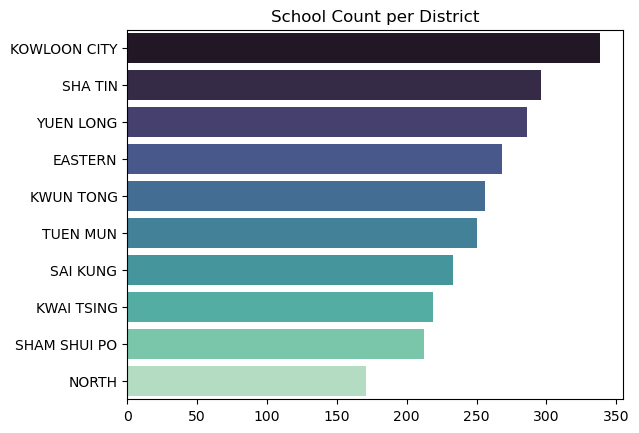

In [29]:
# School Count per District
fig2, ax1 = plt.subplots()

sns.barplot(x='COUNT(*)', y='district', data=df_school_3, ax=ax1, palette='mako').set(title='School Count per District')

ax1.set_xlabel('')
ax1.set_ylabel('')
plt.show()

In [30]:
sql_string_1 = 'SELECT district, finance_type, COUNT(*) FROM HKSchoolList GROUP BY district, finance_type ORDER BY district'
df_school_4 = pd.read_sql(sql_string_1, conn)
df_school_4.head()

,district,finance_type,COUNT(*)
0,CENTRAL AND WESTERN,AIDED,27
1,CENTRAL AND WESTERN,DIRECT SUBSIDY SCHEME,2
2,CENTRAL AND WESTERN,ENGLISH SCHOOLS FOUNDATION,2
3,CENTRAL AND WESTERN,GOVERNMENT,3
4,CENTRAL AND WESTERN,PRIVATE,109


In [31]:
g = df_school_4.groupby(['district','finance_type']).cumcount()

df_school_5 = (df_school_4.set_index([g, 'district','finance_type'])['COUNT(*)']
        .unstack(fill_value=0)
        .reset_index()
        .rename_axis(None, axis=1))

df_school_5.drop(df_school_5.columns[0], axis=1, inplace=True)
df_school_5

,district,AIDED,CAPUT,DIRECT SUBSIDY SCHEME,ENGLISH SCHOOLS FOUNDATION,GOVERNMENT,PRIVATE,PRIVATE INDEPENDENT SCH SCHEME
0,CENTRAL AND WESTERN,27,0,2,2,3,109,0
1,EASTERN,52,0,6,1,7,202,0
2,ISLANDS,26,0,3,0,1,103,2
3,KOWLOON CITY,68,0,8,5,7,249,1
4,KWAI TSING,75,0,1,0,0,143,0
5,KWUN TONG,68,0,7,0,4,177,0
6,NORTH,54,0,1,0,3,113,0
7,SAI KUNG,47,0,11,2,2,171,0
8,SHA TIN,88,0,8,5,3,188,4
9,SHAM SHUI PO,52,1,12,0,4,141,2


In [32]:
column_list_1 = list(df_school_5.columns)

for index, data in enumerate(column_list_1):
    column_list_1[index] = column_list_1[index].replace(" ", "_").lower()

df_school_5.columns = column_list_1
df_school_5

,district,aided,caput,direct_subsidy_scheme,english_schools_foundation,government,private,private_independent_sch_scheme
0,CENTRAL AND WESTERN,27,0,2,2,3,109,0
1,EASTERN,52,0,6,1,7,202,0
2,ISLANDS,26,0,3,0,1,103,2
3,KOWLOON CITY,68,0,8,5,7,249,1
4,KWAI TSING,75,0,1,0,0,143,0
5,KWUN TONG,68,0,7,0,4,177,0
6,NORTH,54,0,1,0,3,113,0
7,SAI KUNG,47,0,11,2,2,171,0
8,SHA TIN,88,0,8,5,3,188,4
9,SHAM SHUI PO,52,1,12,0,4,141,2


In [33]:
df_school_5['total'] = df_school_5.iloc[:, 1:8].sum(axis=1)
df_school_5

,district,aided,caput,direct_subsidy_scheme,english_schools_foundation,government,private,private_independent_sch_scheme,total
0,CENTRAL AND WESTERN,27,0,2,2,3,109,0,143
1,EASTERN,52,0,6,1,7,202,0,268
2,ISLANDS,26,0,3,0,1,103,2,135
3,KOWLOON CITY,68,0,8,5,7,249,1,338
4,KWAI TSING,75,0,1,0,0,143,0,219
5,KWUN TONG,68,0,7,0,4,177,0,256
6,NORTH,54,0,1,0,3,113,0,171
7,SAI KUNG,47,0,11,2,2,171,0,233
8,SHA TIN,88,0,8,5,3,188,4,296
9,SHAM SHUI PO,52,1,12,0,4,141,2,212


In [34]:
#Percentage of private & public schools
public_cols = ['aided','government']
df_school_5['%_public'] = (df_school_5[public_cols].sum(axis=1) / df_school_5['total']) * 100
df_school_5['%_private'] = (df_school_5['private'] / df_school_5['total']) * 100
df_school_5

,district,aided,caput,direct_subsidy_scheme,english_schools_foundation,government,private,private_independent_sch_scheme,total,%_public,%_private
0,CENTRAL AND WESTERN,27,0,2,2,3,109,0,143,20.979021,76.223776
1,EASTERN,52,0,6,1,7,202,0,268,22.014925,75.373134
2,ISLANDS,26,0,3,0,1,103,2,135,20.000000,76.296296
3,KOWLOON CITY,68,0,8,5,7,249,1,338,22.189349,73.668639
4,KWAI TSING,75,0,1,0,0,143,0,219,34.246575,65.296804
5,KWUN TONG,68,0,7,0,4,177,0,256,28.125000,69.140625
6,NORTH,54,0,1,0,3,113,0,171,33.333333,66.081871
7,SAI KUNG,47,0,11,2,2,171,0,233,21.030043,73.390558
8,SHA TIN,88,0,8,5,3,188,4,296,30.743243,63.513514
9,SHAM SHUI PO,52,1,12,0,4,141,2,212,26.415094,66.509434


In [35]:
#Average percentage public vs private
avg_public = df_school_5['%_public'].mean()
avg_private = df_school_5['%_private'].mean()
print("Public School Percentage: ", round(avg_public, 1))
print("Private School Percentage: ", round(avg_private, 1))

Public School Percentage:  28.3
Private School Percentage:  68.5


In [36]:
df_school_6 = df_school_5.copy().sort_values(by='total', ascending=False).head(10)
df_school_6

,district,aided,caput,direct_subsidy_scheme,english_schools_foundation,government,private,private_independent_sch_scheme,total,%_public,%_private
3,KOWLOON CITY,68,0,8,5,7,249,1,338,22.189349,73.668639
8,SHA TIN,88,0,8,5,3,188,4,296,30.743243,63.513514
17,YUEN LONG,83,0,7,0,7,189,0,286,31.468531,66.083916
1,EASTERN,52,0,6,1,7,202,0,268,22.014925,75.373134
5,KWUN TONG,68,0,7,0,4,177,0,256,28.125000,69.140625
13,TUEN MUN,82,0,1,0,3,164,0,250,34.000000,65.600000
7,SAI KUNG,47,0,11,2,2,171,0,233,21.030043,73.390558
4,KWAI TSING,75,0,1,0,0,143,0,219,34.246575,65.296804
9,SHAM SHUI PO,52,1,12,0,4,141,2,212,26.415094,66.509434
6,NORTH,54,0,1,0,3,113,0,171,33.333333,66.081871


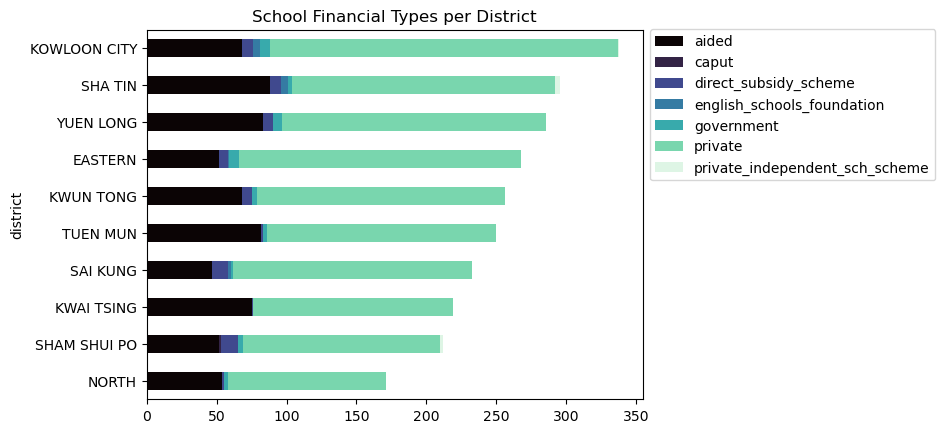

In [37]:
# HK School Data Visualisation
column_to_plot = list(df_school_6.columns[range(1,8)])

palette_color = sns.color_palette('mako')
palette_color_list = sns.color_palette('mako', as_cmap=True)

ax = df_school_6.plot(x="district", y=column_to_plot, kind="barh", colormap=palette_color_list, stacked=True, title='School Financial Types per District')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

ax.invert_yaxis()
# ax.set_facecolor('w')

plt.show()

In [38]:
# HK Population per District
df_tot_pop = pd.read_csv(r"C:\Users\derri\OneDrive\Documents\VSCode\HK Socio Analysis\Demo - Whole Territory_totpoponly.csv")
df_tot_pop

,Population by District Council District and Sex,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Population,NaN,NaN
2,NaN,NaN,Number of Persons,NaN,NaN
3,Sex,NaN,Male,Female,Total
4,Region - Hong Kong Island/ Kowloon/ New Territ...,District Council District - 18 Districts and M...,NaN,NaN,NaN
5,Hong Kong Island,Central and Western,98 282,137 671,235 953
6,NaN,Wan Chai (1),67 075,99 620,166 695
7,NaN,Eastern (1),233 542,296 061,529 603
8,NaN,Southern,116 239,147 039,263 278
9,NaN,Sub-Total,515 138,680 391,1 195 529


In [39]:
df_tot_pop.drop(list(range(0, 5))+list(range(26, 28))+[9,15,25], inplace=True)
df_tot_pop.drop(df_tot_pop.columns[0], axis=1, inplace=True)
df_tot_pop.columns = ['district', 'male', 'female', 'total']
df_tot_pop.reset_index(inplace=True)
df_tot_pop

,index,district,male,female,total
0,5,Central and Western,98 282,137 671,235 953
1,6,Wan Chai (1),67 075,99 620,166 695
2,7,Eastern (1),233 542,296 061,529 603
3,8,Southern,116 239,147 039,263 278
4,10,Yau Tsim Mong,138 873,171 774,310 647
5,11,Sham Shui Po,197 878,233 212,431 090
6,12,Kowloon City,179 518,231 116,410 634
7,13,Wong Tai Sin,187 531,219 271,406 802
8,14,Kwun Tong,312 303,360 863,673 166
9,16,Kwai Tsing,232 213,263 585,495 798


In [40]:
df_tot_pop.drop(df_tot_pop.columns[0], axis=1, inplace=True)
df_tot_pop['district'].replace({'Wan Chai (1)':'Wan Chai', 'Eastern (1)':'Eastern'}, inplace=True)
df_tot_pop['district'] = df_tot_pop['district'].str.upper()
df_tot_pop

,district,male,female,total
0,CENTRAL AND WESTERN,98 282,137 671,235 953
1,WAN CHAI,67 075,99 620,166 695
2,EASTERN,233 542,296 061,529 603
3,SOUTHERN,116 239,147 039,263 278
4,YAU TSIM MONG,138 873,171 774,310 647
5,SHAM SHUI PO,197 878,233 212,431 090
6,KOWLOON CITY,179 518,231 116,410 634
7,WONG TAI SIN,187 531,219 271,406 802
8,KWUN TONG,312 303,360 863,673 166
9,KWAI TSING,232 213,263 585,495 798


In [41]:
column_to_edit = list(df_tot_pop.columns[range(1, 4)])
column_to_edit

for i in column_to_edit:
    df_tot_pop[i] = df_tot_pop[i].str.replace(" ", "")

df_tot_pop

,district,male,female,total
0,CENTRAL AND WESTERN,98282,137671,235953
1,WAN CHAI,67075,99620,166695
2,EASTERN,233542,296061,529603
3,SOUTHERN,116239,147039,263278
4,YAU TSIM MONG,138873,171774,310647
5,SHAM SHUI PO,197878,233212,431090
6,KOWLOON CITY,179518,231116,410634
7,WONG TAI SIN,187531,219271,406802
8,KWUN TONG,312303,360863,673166
9,KWAI TSING,232213,263585,495798


In [42]:
# df_tot_pop.dtypes

for column in df_tot_pop.columns:
    try:
        if df_tot_pop[column].dtype == 'object':
            df_tot_pop[column] = df_tot_pop[column].astype('int64')
    except:
        df_tot_pop[column] = df_tot_pop[column].astype(df_tot_pop[column].dtype)

df_tot_pop.dtypes
df_tot_pop.to_csv('Total Population.csv')

In [43]:
# Data for male-female pie chart
data5 = [df_tot_pop['male'].sum(), df_tot_pop['female'].sum()]
keys = list(df_tot_pop.columns[range(1, 3)])

In [44]:
# Data for barplots
data6 = df_tot_pop.sort_values(by='male', ascending=False).head(10)
data7 = df_tot_pop.sort_values(by='female', ascending=False).head(10)
data8 = df_tot_pop.sort_values(by='total', ascending=False).head(10)
data8

,district,male,female,total
15,SHA TIN,317927,374879,692806
8,KWUN TONG,312303,360863,673166
12,YUEN LONG,314056,354024,668080
2,EASTERN,233542,296061,529603
11,TUEN MUN,240321,266558,506879
9,KWAI TSING,232213,263585,495798
16,SAI KUNG,223094,265943,489037
5,SHAM SHUI PO,197878,233212,431090
6,KOWLOON CITY,179518,231116,410634
7,WONG TAI SIN,187531,219271,406802


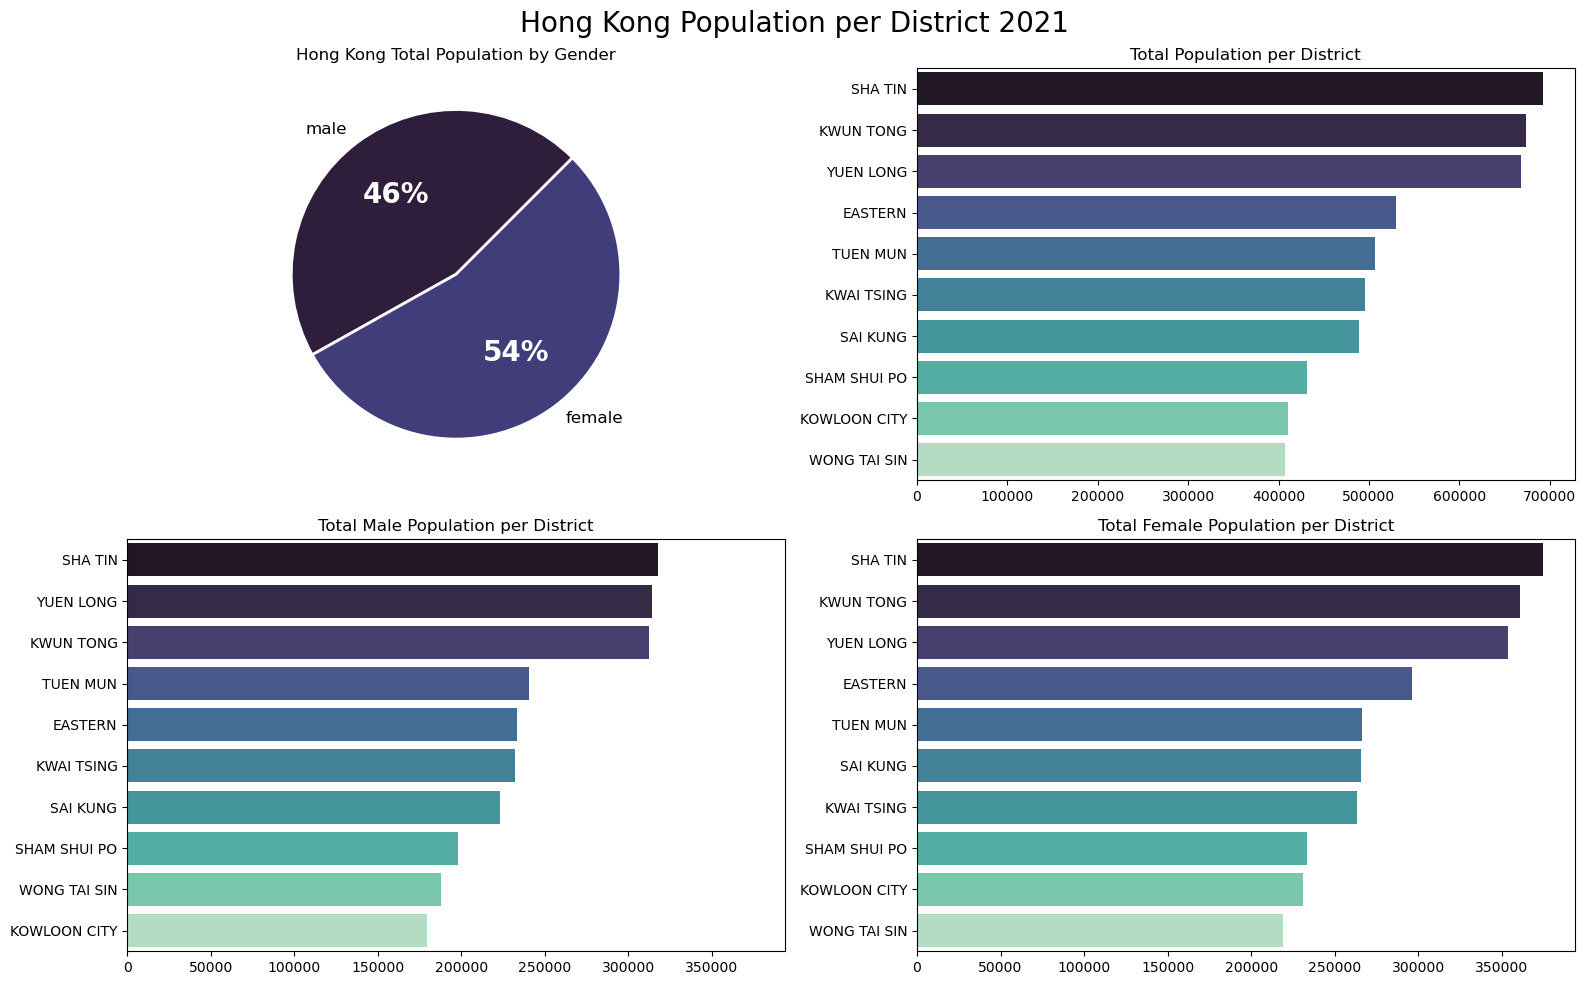

In [45]:
# HK Population per District Visualisation

fig3, axs2 = plt.subplots(2, 2, figsize= (16, 10))
fig3.suptitle('Hong Kong Population per District 2021', size=20)

sns.barplot(x=data8['total'], y=data8['district'], data=data8, ax=axs2[0, 1], palette='mako').set(title='Total Population per District')
sns.barplot(x=data7['female'], y=data7['district'], data=data8, ax=axs2[1, 1], palette='mako').set(title='Total Female Population per District')
sns.barplot(x=data6['male'], y=data6['district'], data=data8, ax=axs2[1, 0], palette='mako').set(title='Total Male Population per District')

_, _, autopcts = axs2[0, 0].pie(data5, labels=keys, colors=palette_color, startangle=45, autopct='%.0f%%', center=[0,0], wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}, textprops={'fontsize': 12})
axs2[0, 0].title.set_text('Hong Kong Total Population by Gender')

axs2[0, 1].set_xlabel('')
axs2[0, 1].set_ylabel('')
axs2[0, 1].xaxis.set_tick_params(labelbottom=True)

axs2[1, 0].set_xlabel('')
axs2[1, 0].set_ylabel('')
axs2[1, 0].xaxis.set_tick_params(labelbottom=True)
axs2[1, 0].sharex(axs2[1, 1])

axs2[1, 1].set_xlabel('')
axs2[1, 1].set_ylabel('')
axs2[1, 1].xaxis.set_tick_params(labelbottom=True)

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize': 20})
plt.subplots_adjust(hspace=.8)
plt.tight_layout()
plt.show()

In [46]:
#HK Population Choropleth Map
#Set up the file path and read the shapefile data
fp = r"C:\Users\derri\OneDrive\Documents\VSCode\HK Socio Analysis\DistrictBoundary_SHP\DCD.shp"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
map_df

,OBJECTID,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE_Leng,SHAPE_Area,geometry
0,1,2016010104,DCD,D,STH,南區,Southern District,HAD,20160101,NaN,55137.919257,9.399167e+07,"POLYGON ((114.16338 22.25882, 114.16340 22.258..."
1,2,2016010102,DCD,B,WC,灣仔區,Wan Chai District,HAD,20160101,NaN,19729.404551,1.234266e+07,"POLYGON ((114.19772 22.25790, 114.19761 22.257..."
2,3,2016010101,DCD,A,CW,中西區,Central and Western District,HAD,20160101,NaN,21739.940418,1.975501e+07,"POLYGON ((114.14951 22.29748, 114.16744 22.290..."
3,4,2016010103,DCD,C,EST,東區,Eastern District,HAD,20160101,NaN,29473.756204,2.609391e+07,"POLYGON ((114.21939 22.29568, 114.24423 22.282..."
4,5,2016010120,DCD,T,ILD,離島區,Islands District,HAD,20160101,NaN,128854.800709,6.647087e+08,"POLYGON ((114.07269 22.31253, 114.10987 22.311..."
5,6,2016010105,DCD,E,YTM,油尖旺區,Yau Tsim Mong District,HAD,20160101,NaN,14892.691647,1.145724e+07,"POLYGON ((114.17447 22.32665, 114.17324 22.324..."
6,7,2016010110,DCD,J,KT,觀塘區,Kwun Tong District,HAD,20160101,NaN,20991.233027,1.396281e+07,"POLYGON ((114.22403 22.33452, 114.22412 22.334..."
7,8,2016010106,DCD,F,SSP,深水埗區,Sham Shui Po District,HAD,20160101,NaN,19592.991899,1.079890e+07,"POLYGON ((114.17273 22.34647, 114.17399 22.344..."
8,9,2016010107,DCD,G,KLC,九龍城區,Kowloon City District,HAD,20160101,NaN,22103.657281,1.444317e+07,"POLYGON ((114.17945 22.34902, 114.18127 22.346..."
9,10,2016010108,DCD,H,WTS,黃大仙區,Wong Tai Sin District,HAD,20160101,NaN,16408.032599,9.302607e+06,"POLYGON ((114.22403 22.33452, 114.22398 22.334..."


<Axes: >

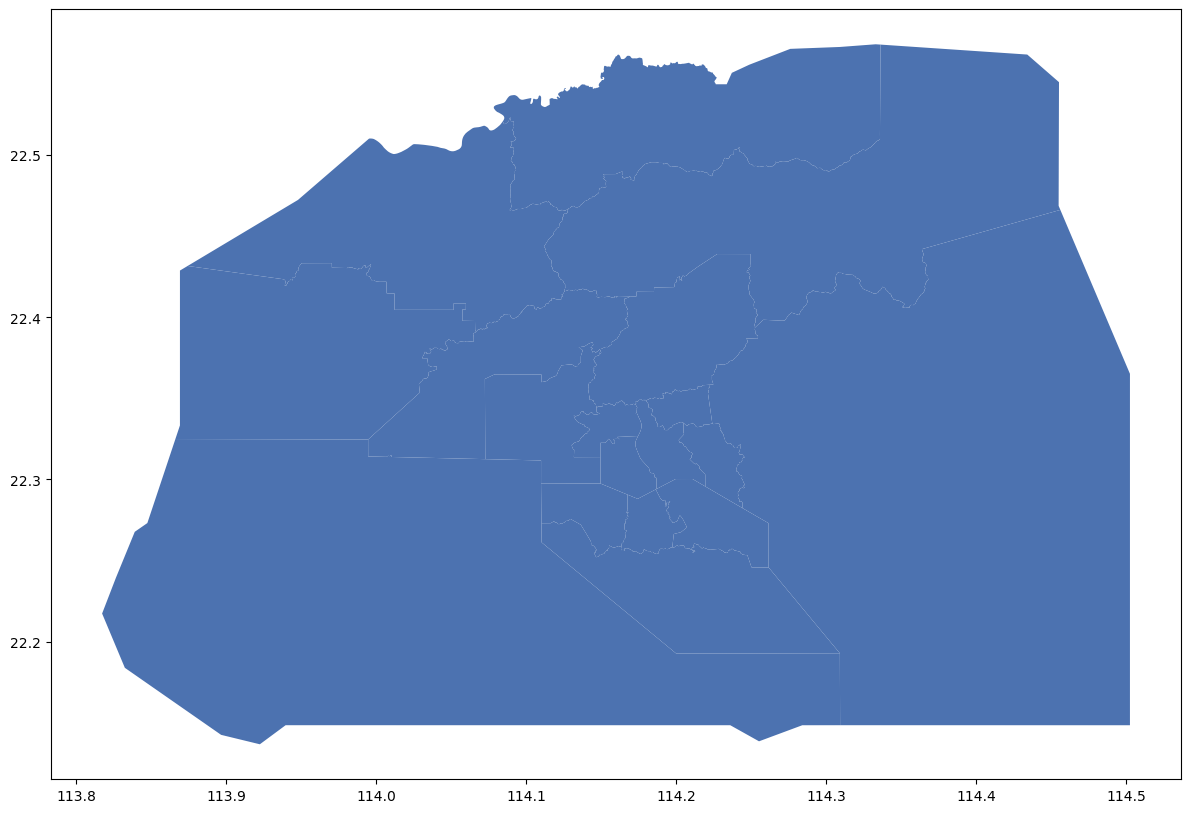

In [47]:
#See what the map looks like
map_df.plot(figsize=(20, 10))

In [48]:
#replace the values in the dataframe
map_df['NAME_EN'] = map_df['NAME_EN'].str.replace(" District", "") 
map_df['NAME_EN'] = map_df['NAME_EN'].str.upper()
map_df

,OBJECTID,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE_Leng,SHAPE_Area,geometry
0,1,2016010104,DCD,D,STH,南區,SOUTHERN,HAD,20160101,NaN,55137.919257,9.399167e+07,"POLYGON ((114.16338 22.25882, 114.16340 22.258..."
1,2,2016010102,DCD,B,WC,灣仔區,WAN CHAI,HAD,20160101,NaN,19729.404551,1.234266e+07,"POLYGON ((114.19772 22.25790, 114.19761 22.257..."
2,3,2016010101,DCD,A,CW,中西區,CENTRAL AND WESTERN,HAD,20160101,NaN,21739.940418,1.975501e+07,"POLYGON ((114.14951 22.29748, 114.16744 22.290..."
3,4,2016010103,DCD,C,EST,東區,EASTERN,HAD,20160101,NaN,29473.756204,2.609391e+07,"POLYGON ((114.21939 22.29568, 114.24423 22.282..."
4,5,2016010120,DCD,T,ILD,離島區,ISLANDS,HAD,20160101,NaN,128854.800709,6.647087e+08,"POLYGON ((114.07269 22.31253, 114.10987 22.311..."
5,6,2016010105,DCD,E,YTM,油尖旺區,YAU TSIM MONG,HAD,20160101,NaN,14892.691647,1.145724e+07,"POLYGON ((114.17447 22.32665, 114.17324 22.324..."
6,7,2016010110,DCD,J,KT,觀塘區,KWUN TONG,HAD,20160101,NaN,20991.233027,1.396281e+07,"POLYGON ((114.22403 22.33452, 114.22412 22.334..."
7,8,2016010106,DCD,F,SSP,深水埗區,SHAM SHUI PO,HAD,20160101,NaN,19592.991899,1.079890e+07,"POLYGON ((114.17273 22.34647, 114.17399 22.344..."
8,9,2016010107,DCD,G,KLC,九龍城區,KOWLOON CITY,HAD,20160101,NaN,22103.657281,1.444317e+07,"POLYGON ((114.17945 22.34902, 114.18127 22.346..."
9,10,2016010108,DCD,H,WTS,黃大仙區,WONG TAI SIN,HAD,20160101,NaN,16408.032599,9.302607e+06,"POLYGON ((114.22403 22.33452, 114.22398 22.334..."


In [49]:
#replace the values in the dataframe
df_merged = map_df.merge(df_tot_pop, #map_df merge to df
 left_on=['NAME_EN'], 
 right_on=['district'])

df_merged

,OBJECTID,CSDI_ADMIN,AREA_TYPE,AREA_ID,AREA_CODE,NAME_TC,NAME_EN,DATA_OWNER,BEGIN_LIFE,END_LIFESP,SHAPE_Leng,SHAPE_Area,geometry,district,male,female,total
0,1,2016010104,DCD,D,STH,南區,SOUTHERN,HAD,20160101,NaN,55137.919257,9.399167e+07,"POLYGON ((114.16338 22.25882, 114.16340 22.258...",SOUTHERN,116239,147039,263278
1,2,2016010102,DCD,B,WC,灣仔區,WAN CHAI,HAD,20160101,NaN,19729.404551,1.234266e+07,"POLYGON ((114.19772 22.25790, 114.19761 22.257...",WAN CHAI,67075,99620,166695
2,3,2016010101,DCD,A,CW,中西區,CENTRAL AND WESTERN,HAD,20160101,NaN,21739.940418,1.975501e+07,"POLYGON ((114.14951 22.29748, 114.16744 22.290...",CENTRAL AND WESTERN,98282,137671,235953
3,4,2016010103,DCD,C,EST,東區,EASTERN,HAD,20160101,NaN,29473.756204,2.609391e+07,"POLYGON ((114.21939 22.29568, 114.24423 22.282...",EASTERN,233542,296061,529603
4,5,2016010120,DCD,T,ILD,離島區,ISLANDS,HAD,20160101,NaN,128854.800709,6.647087e+08,"POLYGON ((114.07269 22.31253, 114.10987 22.311...",ISLANDS,84985,100297,185282
5,6,2016010105,DCD,E,YTM,油尖旺區,YAU TSIM MONG,HAD,20160101,NaN,14892.691647,1.145724e+07,"POLYGON ((114.17447 22.32665, 114.17324 22.324...",YAU TSIM MONG,138873,171774,310647
6,7,2016010110,DCD,J,KT,觀塘區,KWUN TONG,HAD,20160101,NaN,20991.233027,1.396281e+07,"POLYGON ((114.22403 22.33452, 114.22412 22.334...",KWUN TONG,312303,360863,673166
7,8,2016010106,DCD,F,SSP,深水埗區,SHAM SHUI PO,HAD,20160101,NaN,19592.991899,1.079890e+07,"POLYGON ((114.17273 22.34647, 114.17399 22.344...",SHAM SHUI PO,197878,233212,431090
8,9,2016010107,DCD,G,KLC,九龍城區,KOWLOON CITY,HAD,20160101,NaN,22103.657281,1.444317e+07,"POLYGON ((114.17945 22.34902, 114.18127 22.346...",KOWLOON CITY,179518,231116,410634
9,10,2016010108,DCD,H,WTS,黃大仙區,WONG TAI SIN,HAD,20160101,NaN,16408.032599,9.302607e+06,"POLYGON ((114.22403 22.33452, 114.22398 22.334...",WONG TAI SIN,187531,219271,406802


In [50]:
df_merged.columns
df_merged_1 = df_merged.iloc[:, [4, 10, 11, 12, 13, 14, 15, 16]].set_index('district')
df_merged_1

,AREA_CODE,SHAPE_Leng,SHAPE_Area,geometry,male,female,total
district,,,,,,,
SOUTHERN,STH,55137.919257,9.399167e+07,"POLYGON ((114.16338 22.25882, 114.16340 22.258...",116239,147039,263278
WAN CHAI,WC,19729.404551,1.234266e+07,"POLYGON ((114.19772 22.25790, 114.19761 22.257...",67075,99620,166695
CENTRAL AND WESTERN,CW,21739.940418,1.975501e+07,"POLYGON ((114.14951 22.29748, 114.16744 22.290...",98282,137671,235953
EASTERN,EST,29473.756204,2.609391e+07,"POLYGON ((114.21939 22.29568, 114.24423 22.282...",233542,296061,529603
ISLANDS,ILD,128854.800709,6.647087e+08,"POLYGON ((114.07269 22.31253, 114.10987 22.311...",84985,100297,185282
YAU TSIM MONG,YTM,14892.691647,1.145724e+07,"POLYGON ((114.17447 22.32665, 114.17324 22.324...",138873,171774,310647
KWUN TONG,KT,20991.233027,1.396281e+07,"POLYGON ((114.22403 22.33452, 114.22412 22.334...",312303,360863,673166
SHAM SHUI PO,SSP,19592.991899,1.079890e+07,"POLYGON ((114.17273 22.34647, 114.17399 22.344...",197878,233212,431090
KOWLOON CITY,KLC,22103.657281,1.444317e+07,"POLYGON ((114.17945 22.34902, 114.18127 22.346...",179518,231116,410634


In [57]:
#configure download resolution
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 1080,
    'width': 1920,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

In [61]:
#Labels
texttrace = go.Scattermapbox(
        lat=df_merged.geometry.centroid.y,
        lon=df_merged.geometry.centroid.x,
        text=df_merged['district'].astype(str),
        textfont={"color":"white","size":20, "family":"Courier New"},
        mode="text",
        name="district"
    )

C:\Users\derri\AppData\Local\Temp\ipykernel_16292\948640937.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\derri\AppData\Local\Temp\ipykernel_16292\948640937.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




In [64]:
#Visualise with Plotly
fig1 = px.choropleth_mapbox(df_merged_1, geojson=df_merged_1.geometry, 
                    locations=df_merged_1.index, color="total",
                    height=500,  opacity=0.65,
                   color_continuous_scale="Blues")
fig1.update_geos(fitbounds="locations", visible=True)
fig1.update_layout(
    title_text='Hong Kong Population 2021'
)
fig1.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9, mapbox_center = {"lat": 22.382856, "lon": 114.126157})
fig1.update(layout = dict(title=dict(x=0.5)))
fig1.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={
        'title':'total'})
# fig1.add_trace(texttrace)
fig1.show(config=config)

(0.0, 354.9, 9.5, -0.5)

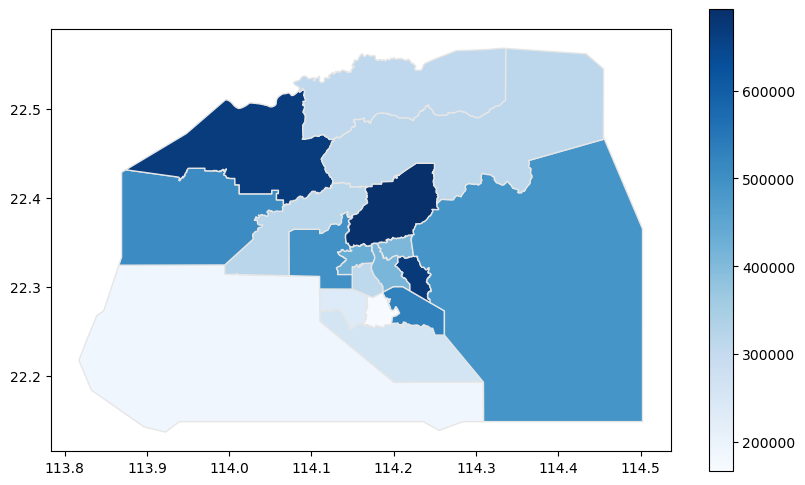

In [65]:
fig1a, ax2 = plt.subplots(1, figsize=(10,6))
df_merged_1.plot(column='total', cmap='Blues', linewidth=1, ax=ax2, edgecolor='0.9', legend = True)
ax.axis('off')

In [ ]:
df2.columns


Index(['Ownership', 'Address', 'Area (about) (m²)', 'Name', 'Remarks',
       'Northing', 'GMID', 'Accessibility / Location',
       'Relevant District Lands Office', 'Opening Hours',
       'Provision of Barrier-free-access Facilities',
       'Provision of Sheltered Seating', 'Relevant District Council',
       'Easting'],
      dtype='object')

In [ ]:
df2['Relevant District Council'].replace('CENTRAL & WESTERN', 'CENTRAL AND WESTERN', inplace=True)

In [ ]:
df_pops2.columns

Index(['GMID', 'Dataset', 'Address', 'District', 'Area', 'Level',
       'Opening Hours', 'Remarks', 'Location Map', 'Northing', 'Easting',
       'Latitude', 'Longitude', 'Last Update'],
      dtype='object')

In [ ]:
df_parks2.columns

Index(['GMID', 'Dataset', 'Facility Name', 'Address', 'District',
       'Facility Type', 'Opening Hours', 'Telephone', 'Fax Number',
       'Email Address', 'Website', 'Facility Details', 'Northing', 'Easting',
       'Latitude', 'Longitude', 'Last Update'],
      dtype='object')

In [ ]:
df_pf2.columns

Index(['ownershipEN', 'locationEN', 'nameEN', 'relevantDistrictCouncilEN'], dtype='object')

In [ ]:
data1 = df2['Relevant District Council'].value_counts().head(10).rename_axis('districts').reset_index(name='counts')
data2 = df_pops2['District'].value_counts().head(10).rename_axis('districts').reset_index(name='counts')
data3 = df_parks2['District'].value_counts().head(10).rename_axis('districts').reset_index(name='counts')
data4 = df_pf2['relevantDistrictCouncilEN'].value_counts().head(10).rename_axis('districts').reset_index(name='counts')
data1

,districts,counts
0,CENTRAL AND WESTERN,19
1,YAU TSIM MONG,8
2,KOWLOON CITY,8
3,EASTERN,8
4,TSUEN WAN,7
5,WAN CHAI,7
6,SHAM SHUI PO,6
7,ISLANDS,6
8,KWAI TSING,5
9,KWUN TONG,4


In [ ]:
df2.to_csv('Public Open Space_1.csv')
df_pops2.to_csv('Privately Owned Public Space_1.csv')
df_parks2.to_csv('Parks, Gardens and Zoos_1.csv')
df_pf2.to_csv('Public Facilities_1.csv')

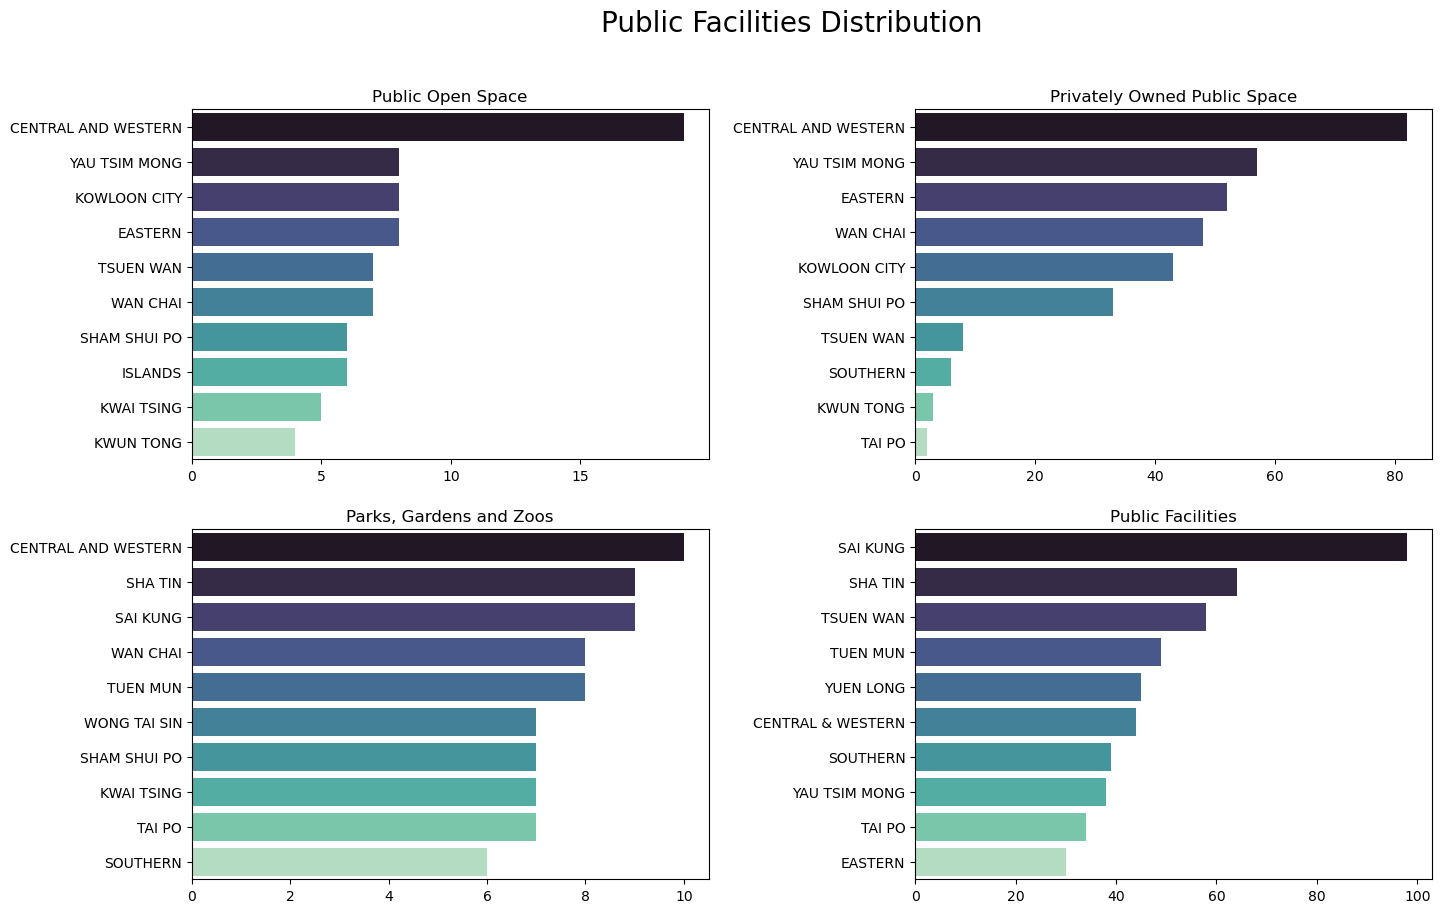

In [ ]:
# Data Visualisation

fig, axs = plt.subplots(2, 2, figsize= (16, 10))
fig.suptitle('Public Facilities Distribution', size=20)

sns.barplot(x='counts', y='districts', data=data1, ax=axs[0,0], palette='mako').set(title='Public Open Space')
sns.barplot(x='counts', y='districts', data=data2, ax=axs[0,1], palette='mako').set(title='Privately Owned Public Space')
sns.barplot(x='counts', y='districts', data=data3, ax=axs[1,0], palette='mako').set(title='Parks, Gardens and Zoos')
sns.barplot(x='counts', y='districts', data=data4, ax=axs[1,1], palette='mako').set(title='Public Facilities')

# axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].xaxis.set_major_locator(MultipleLocator(5))
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('')

# axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].xaxis.set_major_locator(MultipleLocator(20))
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')

# axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('')

# axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('')

plt.subplots_adjust(wspace=.4)
plt.show()